# Extract the dataset

In [33]:
# If you would want to run it on google colab, uncomment the below lines of code and execute the cells.
# Otherwise you can run it from the next coresponding cell on Juyter Notebook by unzipping the skeletondata 
# and placing it in the current working directory. 

# Dataset Google Drive link: 
# https://drive.google.com/file/d/1tOs-UGoD00Y_AdZsBTy-pTlBQJteyB2a/view?usp=sharing


# Uncomment from below line if you would like to run it on Google Colab.
# from google.colab import drive
# # drive.mount('/content/drive', force_remount=True)
# drive.mount('/content/drive')

# !cp "/content/drive/MyDrive/Colab Notebooks/skeletondata.zip" .
# !unzip skeletondata.zip

# Subclasses in skeletondata

In [6]:
import os

dataset_path = "./skeletondata"

subclasses = sorted(os.listdir(dataset_path))
print(subclasses)

['clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'laughing', 'running', 'sitting', 'sleeping']


# Create image data generator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TSIZE = (244, 244)
BSIZE = 64

data_generator = ImageDataGenerator(zoom_range=.2, rotation_range=.2, rescale=1/255, horizontal_flip=True)
training_data = data_generator.flow_from_directory(directory=dataset_path, target_size=TSIZE, batch_size=BSIZE)
training_data.class_indices # Indicies os subclasses

Found 10000 images belonging to 10 classes.


{'clapping': 0,
 'cycling': 1,
 'dancing': 2,
 'drinking': 3,
 'eating': 4,
 'fighting': 5,
 'laughing': 6,
 'running': 7,
 'sitting': 8,
 'sleeping': 9}

# Create a Convolutional Neural Network of type VGG16

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten

N_CHANNELS = 3
IMAGE_SHAPE = (*TSIZE, N_CHANNELS)

vgg16 = VGG16(include_top=False, input_shape=IMAGE_SHAPE)

# Make all layers untrainable
for layer in vgg16.layers:
  layer.trainable = False

N_UNITS, AF = len(subclasses), 'softmax'
dense_layer = Dense(units=N_UNITS, activation=AF)

flatten = Flatten()
flatten = flatten(vgg16.output)

_inputs = vgg16.inputs
_outputs = dense_layer(flatten)

Metal device set to: Apple M2 Pro
58889256/58889256 [==============================] - 2s 0us/step


# Create the classification model for the skeleton data

In [9]:
from tensorflow.keras.models import Model

LOSS_TYPE = "categorical_crossentropy"

model = Model(inputs=_inputs, outputs=_outputs)
model.compile(loss=LOSS_TYPE, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

# Train the model

In [10]:
N_EPOCHS = 15 # Increase the number to improve the accuracy of model
MODEL_FILENAME = "./skeleton_classifier_mode.h5"

model.fit(training_data, epochs=N_EPOCHS)
model.save(MODEL_FILENAME)

Epoch 1/15


2023-05-07 11:09:28.518312: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 79s 492ms/step - loss: 2.9026 - accuracy: 0.2251
Epoch 2/15
157/157 [==============================] - 78s 491ms/step - loss: 2.5531 - accuracy: 0.2742
Epoch 3/15
157/157 [==============================] - 78s 491ms/step - loss: 2.4602 - accuracy: 0.2973
Epoch 4/15
157/157 [==============================] - 78s 491ms/step - loss: 2.4571 - accuracy: 0.3048
Epoch 5/15
157/157 [==============================] - 78s 492ms/step - loss: 2.3800 - accuracy: 0.3178
Epoch 6/15
157/157 [==============================] - 78s 492ms/step - loss: 2.3159 - accuracy: 0.3355
Epoch 7/15
157/157 [==============================] - 78s 491ms/step - loss: 2.2804 - accuracy: 0.3428
Epoch 8/15
157/157 [==============================] - 78s 492ms/step - loss: 2.2692 - accuracy: 0.3455
Epoch 9/15
157/157 [==============================] - 77s 494ms/step - loss: 2.2251 - accuracy: 0.3514
Epoch 10/15
157/157 [==============================] - 78s 492ms/step - loss: 2.1866

# Fetch file-paths to test images 

In [11]:
test_image_paths = dict()
for subclass in subclasses:
  subclass_path = os.path.join(dataset_path, subclass)
  test_image_paths[subclass] = sorted(os.path.join(subclass_path, filename) for filename in os.listdir(subclass_path))

test_image_paths

{'clapping': ['./skeletondata/clapping/0.png',
  './skeletondata/clapping/1.png',
  './skeletondata/clapping/10.png',
  './skeletondata/clapping/100.png',
  './skeletondata/clapping/101.png',
  './skeletondata/clapping/102.png',
  './skeletondata/clapping/103.png',
  './skeletondata/clapping/104.png',
  './skeletondata/clapping/105.png',
  './skeletondata/clapping/106.png',
  './skeletondata/clapping/107.png',
  './skeletondata/clapping/108.png',
  './skeletondata/clapping/109.png',
  './skeletondata/clapping/11.png',
  './skeletondata/clapping/110.png',
  './skeletondata/clapping/111.png',
  './skeletondata/clapping/112.png',
  './skeletondata/clapping/113.png',
  './skeletondata/clapping/114.png',
  './skeletondata/clapping/115.png',
  './skeletondata/clapping/116.png',
  './skeletondata/clapping/117.png',
  './skeletondata/clapping/118.png',
  './skeletondata/clapping/119.png',
  './skeletondata/clapping/12.png',
  './skeletondata/clapping/120.png',
  './skeletondata/clapping/121.pn

# Function to predict the class of the image

In [27]:
import cv2
import matplotlib.pyplot as plt

def predict_class(image):
  image = cv2.resize(image, TSIZE)
  image = image.reshape(1, *IMAGE_SHAPE) / 255
  CLASS_INDEX = model.predict(image).argmax()
  return list(training_data.class_indices)[CLASS_INDEX]

# Test **clapping** class image

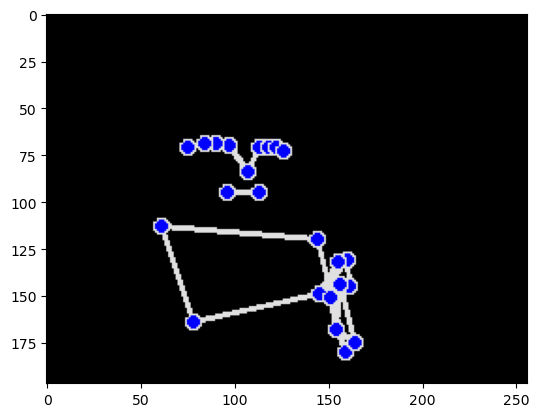

1/1 [==============================] - 0s 17ms/step
Predicted class: clapping


In [44]:
skeleton_image = cv2.imread(test_image_paths['clapping'][1])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **cycling** class image

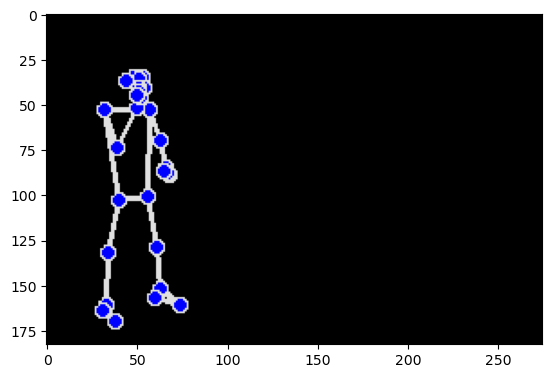

1/1 [==============================] - 0s 11ms/step
Predicted class: cycling


In [45]:
skeleton_image = cv2.imread(test_image_paths['cycling'][5])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **dancing** class image

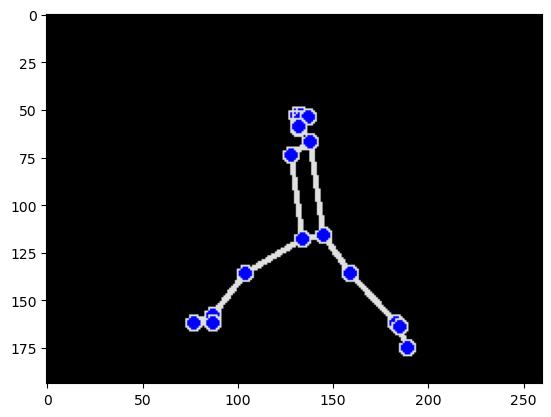

1/1 [==============================] - 0s 12ms/step
Predicted class: dancing


In [46]:
skeleton_image = cv2.imread(test_image_paths['dancing'][0])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **drinking** class image

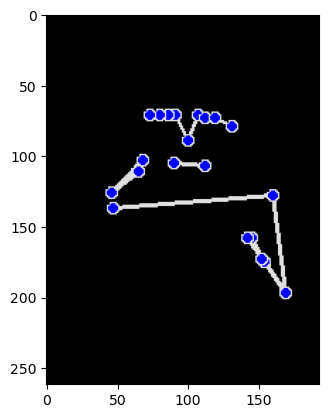

1/1 [==============================] - 0s 11ms/step
Predicted class: drinking


In [47]:
skeleton_image = cv2.imread(test_image_paths['drinking'][3])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **eating** class image

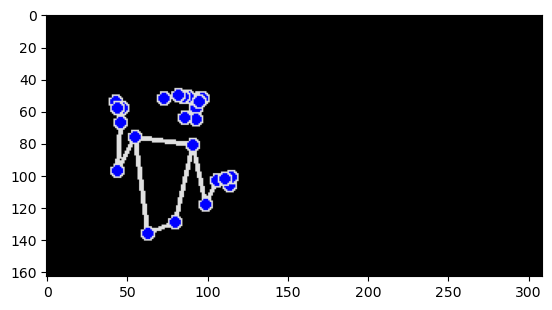

1/1 [==============================] - 0s 11ms/step
Predicted class: eating


In [48]:
skeleton_image = cv2.imread(test_image_paths['eating'][0])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **fighting** class image

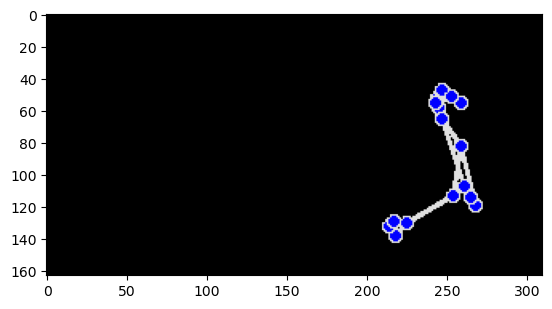

1/1 [==============================] - 0s 12ms/step
Predicted class: eating


In [49]:
skeleton_image = cv2.imread(test_image_paths['fighting'][6])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **laughing** class image

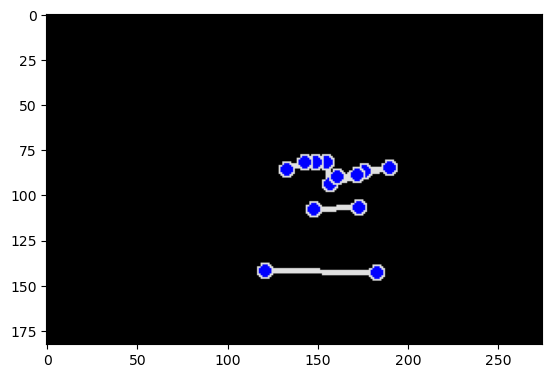

1/1 [==============================] - 0s 11ms/step
Predicted class: laughing


In [50]:
skeleton_image = cv2.imread(test_image_paths['laughing'][2])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **running** class image

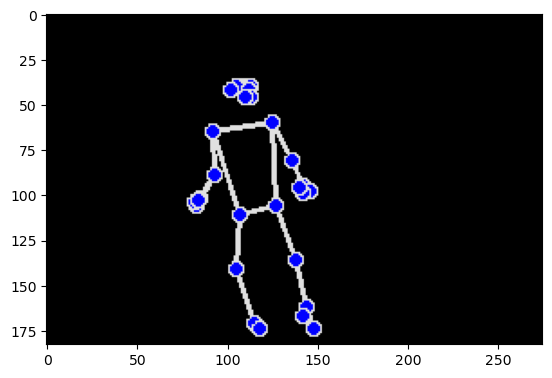

1/1 [==============================] - 0s 12ms/step
Predicted class: running


In [51]:
skeleton_image = cv2.imread(test_image_paths['running'][0])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **sitting** class image

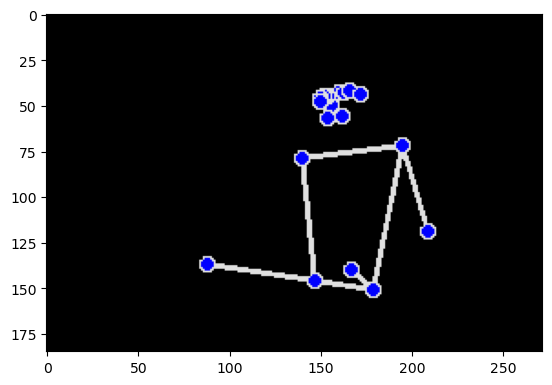

1/1 [==============================] - 0s 12ms/step
Predicted class: sitting


In [52]:
skeleton_image = cv2.imread(test_image_paths['sitting'][1])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))

# Test **sleeping** class image

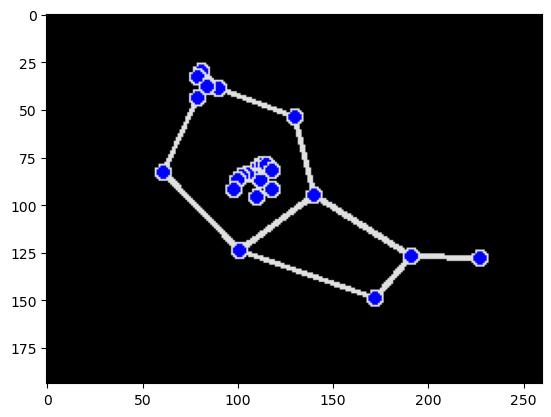

1/1 [==============================] - 0s 12ms/step
Predicted class: sleeping


In [53]:
skeleton_image = cv2.imread(test_image_paths['sleeping'][1])
plt.imshow(skeleton_image)
plt.show()

print("Predicted class:", predict_class(skeleton_image))